In [2]:
import tensorflow as tf

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [25]:
import os
import idx2numpy
from tensorflow.keras.utils import to_categorical

# Specify the path to the directory containing the ubyte files
data_dir = 'C:\\Users\\Duke\\Desktop\\Deep Learning and Machine Learning\\Deep Learning\\MNIST_data'

# Load the training set
train_images_path = os.path.join(data_dir, 'train-images.idx3-ubyte')
train_labels_path = os.path.join(data_dir, 'train-labels.idx1-ubyte')

# Use idx2numpy to convert ubyte files to numpy arrays
train_images = idx2numpy.convert_from_file(train_images_path)
train_labels = idx2numpy.convert_from_file(train_labels_path)

# Normalize pixel values to be between 0 and 1
train_images = train_images.astype('float32') / 255.0

# Reshape the images to (28, 28, 1) if they are not already in that shape
train_images = np.expand_dims(train_images, axis=-1)

# Convert labels to one-hot encoding
train_labels = to_categorical(train_labels, num_classes=10)  # Assuming 10 classes for MNIST

# Now, you can use train_images and train_labels with your TensorFlow model


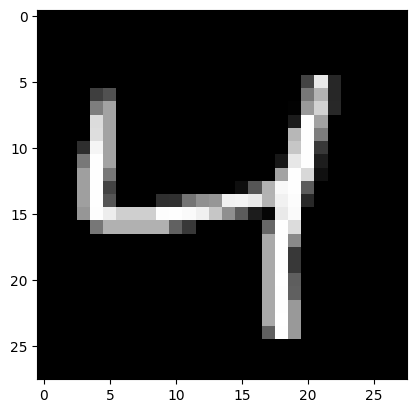

In [36]:
plt.imshow(train_images[2].reshape(28,28), cmap='gist_gray')

In [37]:
train_images[1].max()

1.0

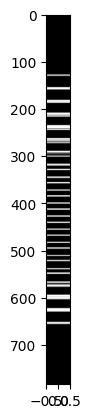

In [38]:
plt.imshow(train_images[1].reshape(784,1), cmap='gist_gray',aspect= 0.02)

In [51]:
input_shape = (28, 28, 1)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout,Dense,Flatten

# Create a sequential model
model = Sequential()

# Flatten the input for fully connected layers
model.add(Flatten(input_shape=input_shape))

# Add a dense layer with ReLU activation
model.add(Dense(128, activation='relu'))

# Add a dropout layer for regularization
model.add(Dropout(0.5))

# Add the output layer with softmax activation (assuming 10 classes for MNIST)
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [52]:
history = model.fit(
    train_images,            # Input images
    train_labels,            # Target labels
    epochs=10,               # Number of training epochs
    batch_size=32,           # Batch size
    validation_split=0.2     # Fraction of training data to be used as validation set
)

Epoch 1/10


1500/1500 [==============================] - 27s 7ms/step - loss: 0.4301 - accuracy: 0.8725 - val_loss: 0.1765 - val_accuracy: 0.9491
Epoch 2/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2410 - accuracy: 0.9285 - val_loss: 0.1439 - val_accuracy: 0.9598
Epoch 3/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1994 - accuracy: 0.9404 - val_loss: 0.1169 - val_accuracy: 0.9668
Epoch 4/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1753 - accuracy: 0.9470 - val_loss: 0.1130 - val_accuracy: 0.9683
Epoch 5/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.1607 - accuracy: 0.9503 - val_loss: 0.1048 - val_accuracy: 0.9716
Epoch 6/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1462 - accuracy: 0.9555 - val_loss: 0.0994 - val_accuracy: 0.9714
Epoch 7/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1357 - accuracy: 0.9578 - val_loss: 0.0933 - val_accu

In [61]:
history_data = pd.DataFrame(data=history.history)

<Axes: >

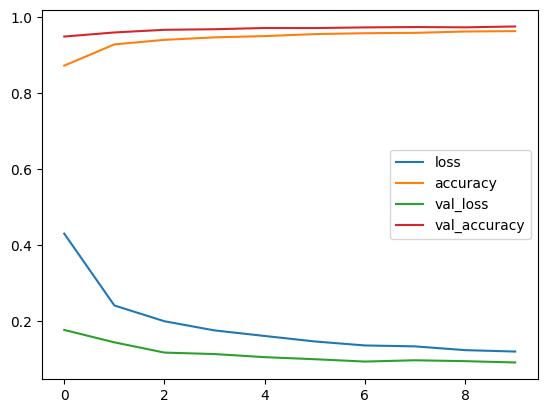

In [62]:
history_data.plot()

In [70]:
data_dir = 'C:\\Users\\Duke\\Desktop\\Deep Learning and Machine Learning\\Deep Learning\\MNIST_data'

# Load the training set
test_images_path = os.path.join(data_dir, 't10k-images.idx3-ubyte')
test_labels_path = os.path.join(data_dir, 't10k-labels.idx1-ubyte')

# Use idx2numpy to convert ubyte files to numpy arrays
test_images = idx2numpy.convert_from_file(test_images_path)
test_labels = idx2numpy.convert_from_file(test_labels_path)

# Normalize pixel values to be between 0 and 1
test_images = test_images.astype('float32') / 255.0

# Reshape the images to (28, 28, 1) if they are not already in that shape
test_images = np.expand_dims(test_images, axis=-1)

# Convert labels to one-hot encoding
test_labels = to_categorical(test_labels, num_classes=10)  # Assuming 10 classes for MNIST

# Now, you can use test_images and train_labels with your TensorFlow model


In [71]:
predictions = model.predict(test_images)

313/313 [==============================] - 3s 3ms/step


In [72]:
true_labels = np.argmax(test_labels, axis=1)
predicted_labels = np.argmax(predictions, axis=1)

In [73]:
from sklearn.metrics import confusion_matrix, classification_report

In [74]:
confusion_matrix(true_labels, predicted_labels)

array([[ 970,    0,    2,    2,    2,    0,    2,    1,    1,    0],
       [   0, 1121,    4,    2,    0,    1,    1,    1,    5,    0],
       [   3,    2, 1003,    2,    4,    0,    2,    7,    9,    0],
       [   0,    0,    8,  989,    0,    4,    0,    5,    4,    0],
       [   1,    0,    1,    0,  964,    0,    5,    1,    2,    8],
       [   2,    1,    0,    6,    2,  864,    6,    2,    4,    5],
       [   5,    3,    1,    1,    6,    4,  932,    0,    6,    0],
       [   1,    4,    9,    4,    0,    0,    0,  999,    2,    9],
       [   4,    0,    3,    4,    5,    4,    2,    8,  942,    2],
       [   2,    4,    0,    6,   13,    5,    1,    4,    3,  971]],
      dtype=int64)

In [75]:
classification_report(true_labels, predicted_labels)

'              precision    recall  f1-score   support\n\n           0       0.98      0.99      0.99       980\n           1       0.99      0.99      0.99      1135\n           2       0.97      0.97      0.97      1032\n           3       0.97      0.98      0.98      1010\n           4       0.97      0.98      0.97       982\n           5       0.98      0.97      0.97       892\n           6       0.98      0.97      0.98       958\n           7       0.97      0.97      0.97      1028\n           8       0.96      0.97      0.97       974\n           9       0.98      0.96      0.97      1009\n\n    accuracy                           0.98     10000\n   macro avg       0.98      0.98      0.98     10000\nweighted avg       0.98      0.98      0.98     10000\n'

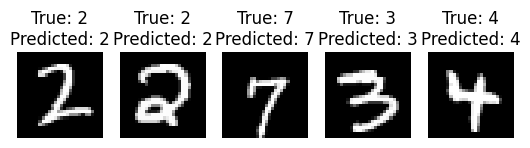

In [101]:
num_examples = 5
random_indices = np.random.choice(len(test_images), num_examples)

# Plot the images with true and predicted labels
for i, idx in enumerate(random_indices):
    plt.subplot(1, num_examples, i + 1)
    plt.imshow(test_images[idx].reshape(28, 28), cmap='gray')  # Adjust dimensions if needed
    plt.title(f'True: {true_labels[idx]}\nPredicted: {predicted_labels[idx]}')
    plt.axis('off')

plt.show()